In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate ,RandomizedSearchCV ,validation_curve
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.stats import ttest_1samp , shapiro , levene , ttest_ind ,mannwhitneyu ,pearsonr,spearmanr,kendalltau,f_oneway,kruskal

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
        roc_auc_score, confusion_matrix, classification_report, plot_roc_curve, mean_squared_error

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
data = pd.read_csv("C:/Users/can/Desktop/hitters.csv")
df = data.copy()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


In [4]:
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.000,A


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
num_cols = [col for col in df.columns if col not in cat_cols]

cat_cols,num_cols = cat_cols,num_cols


In [7]:
cat_cols

['League', 'Division', 'NewLeague']

## Kategorik Değişken Analizi

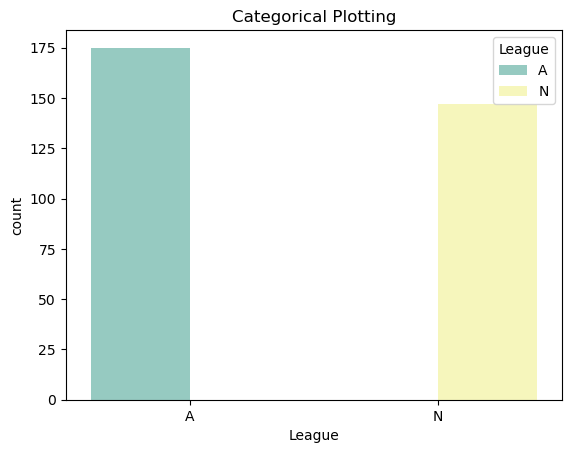

In [8]:
sns.countplot(x="League", hue="League", data=df,palette="Set3")
plt.title('Categorical Plotting')
plt.show()

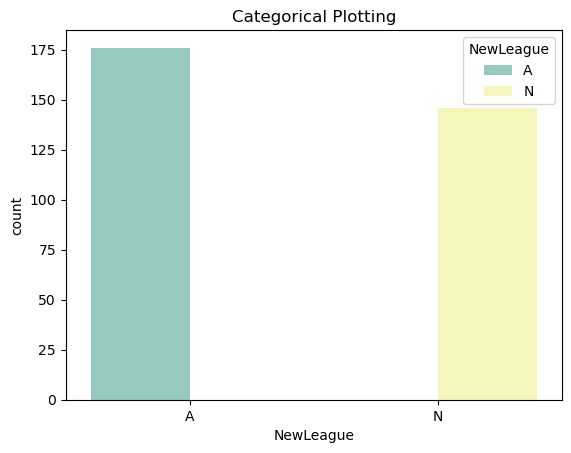

In [9]:
sns.countplot(x="NewLeague", hue="NewLeague", data=df,palette="Set3")
plt.title('Categorical Plotting')
plt.show()

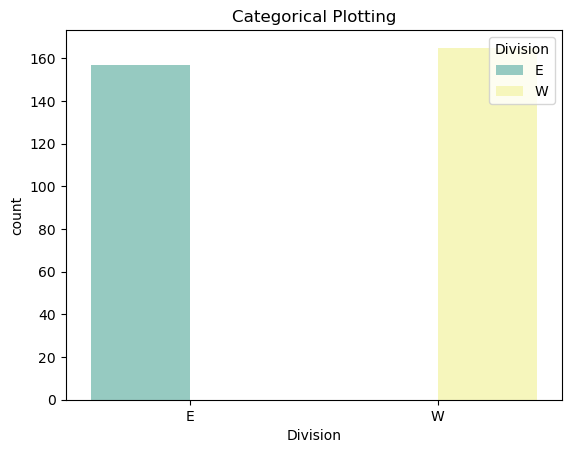

In [10]:
sns.countplot(x="Division", hue="Division", data=df,palette="Set3")
plt.title('Categorical Plotting')
plt.show()

             A       N
League 175.000 147.000
League  54.348  45.652


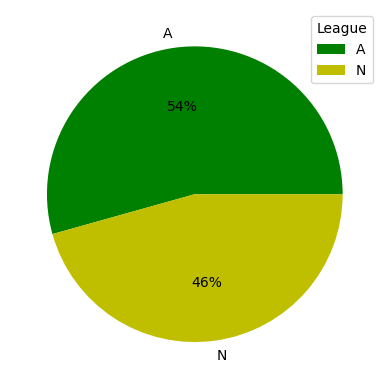

               W       E
Division 165.000 157.000
Division  51.242  48.758


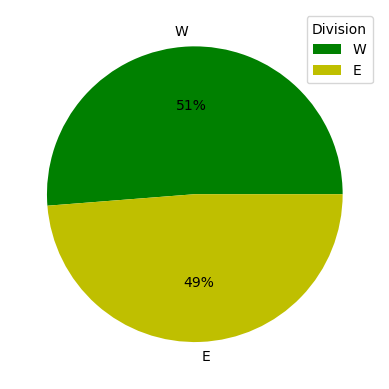

                A       N
NewLeague 176.000 146.000
NewLeague  54.658  45.342


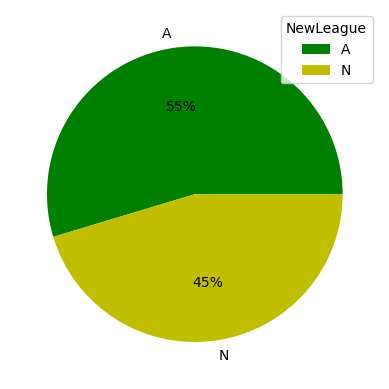

In [11]:
def kategorik_analiz(dataframe,col_name, pieplot = False ):
    print(pd.DataFrame((dataframe[col_name].value_counts(),dataframe[col_name].value_counts(normalize=True)*100)))

    if pieplot:

        labels = df[col_name].value_counts().index
        my_colors = ["g", "y", "#ff9999"]
        plt.pie(df[col_name].value_counts(),labels=labels,colors=my_colors,autopct='%.0f%%')
        plt.legend(title = col_name)
        plt.show()
for col in cat_cols:
    kategorik_analiz(df,col,pieplot=True)

In [12]:
def rare_analyser(dataframe,target,cat_cols):
    for col in cat_cols:
        print(col,":",len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT":dataframe[col].value_counts(),
                           "RATIO":dataframe[col].value_counts()/len(dataframe),
                           "TARGET_MEAN": dataframe.groupby(col)[target].mean()}),end = "\n\n\n")

In [13]:
rare_analyser(df, "Salary", cat_cols)


League : 2
   COUNT  RATIO  TARGET_MEAN
A    175  0.543      542.000
N    147  0.457      529.118


Division : 2
   COUNT  RATIO  TARGET_MEAN
E    157  0.488      624.271
W    165  0.512      450.877


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
A    176  0.547      537.113
N    146  0.453      534.554




## Numerik Değişken Analizi

In [14]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,322.000,263.000
mean,380.929,101.025,10.770,50.910,48.028,38.742,7.444,2648.683,717.571,69.491,358.795,330.118,260.239,288.938,106.913,8.040,535.926
std,153.405,46.455,8.709,26.024,26.167,21.639,4.926,2324.206,654.473,86.266,334.106,333.220,267.058,280.705,136.855,6.368,451.119
min,16.000,1.000,0.000,0.000,0.000,0.000,1.000,19.000,4.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,67.500
25%,255.250,64.000,4.000,30.250,28.000,22.000,4.000,816.750,209.000,14.000,100.250,88.750,67.250,109.250,7.000,3.000,190.000
50%,379.500,96.000,8.000,48.000,44.000,35.000,6.000,1928.000,508.000,37.500,247.000,220.500,170.500,212.000,39.500,6.000,425.000
75%,512.000,137.000,16.000,69.000,64.750,53.000,11.000,3924.250,1059.250,90.000,526.250,426.250,339.250,325.000,166.000,11.000,750.000
max,687.000,238.000,40.000,130.000,121.000,105.000,24.000,14053.000,4256.000,548.000,2165.000,1659.000,1566.000,1378.000,492.000,32.000,2460.000


count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
max     687.000
Name: AtBat, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


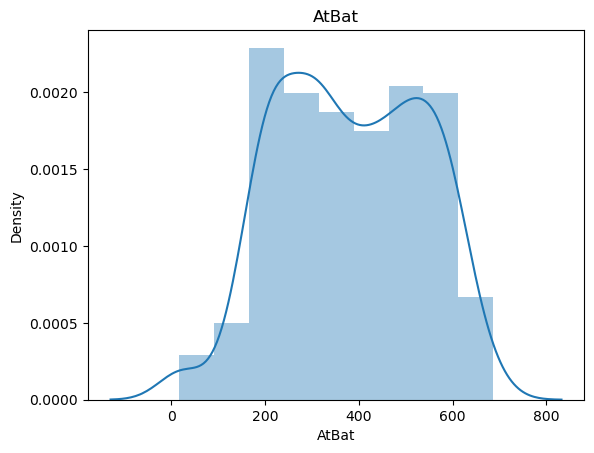

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
max     238.000
Name: Hits, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


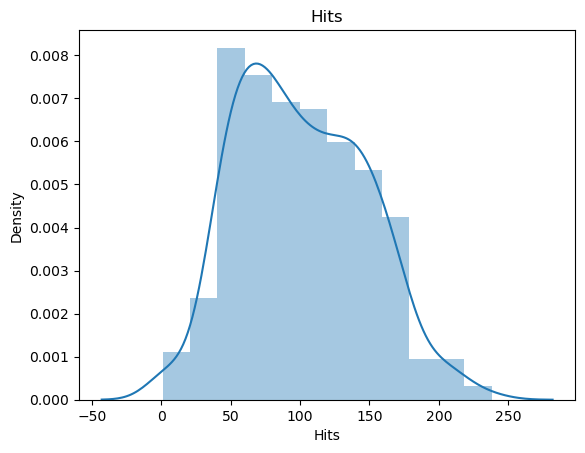

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
max      40.000
Name: HmRun, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


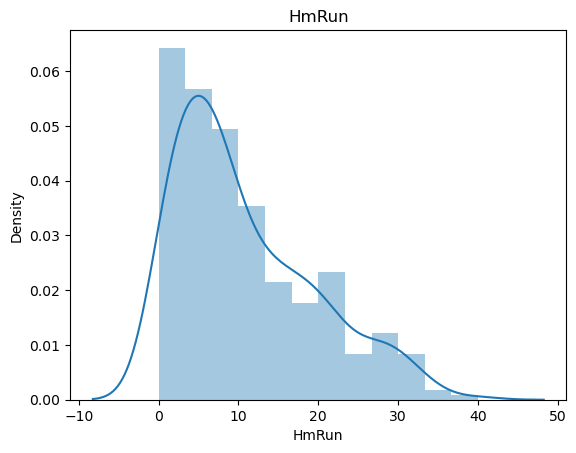

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
max     130.000
Name: Runs, dtype: float64


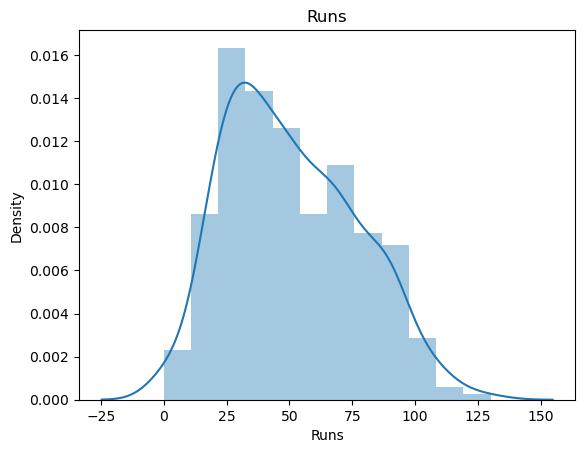

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
max     121.000
Name: RBI, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


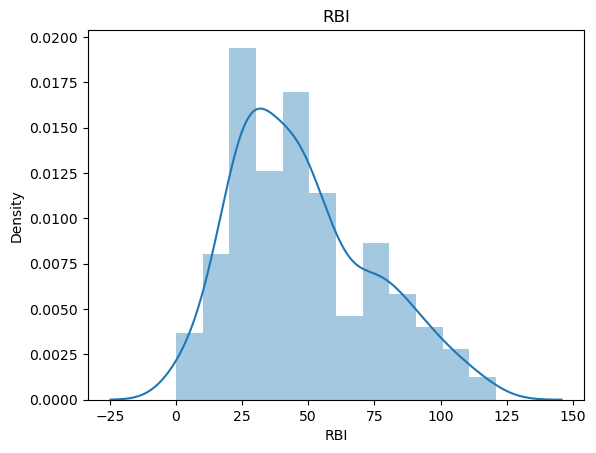

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
max     105.000
Name: Walks, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


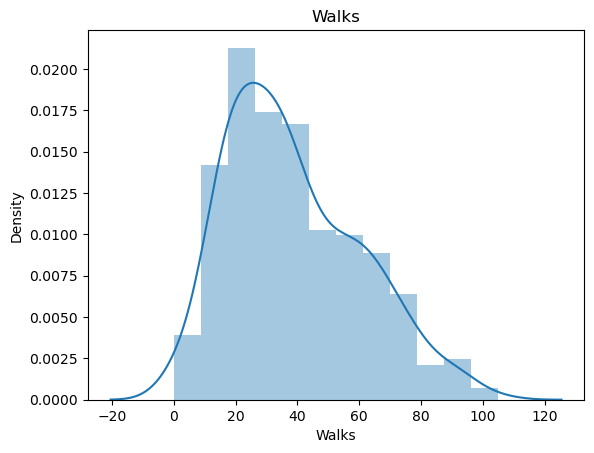

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
max      24.000
Name: Years, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


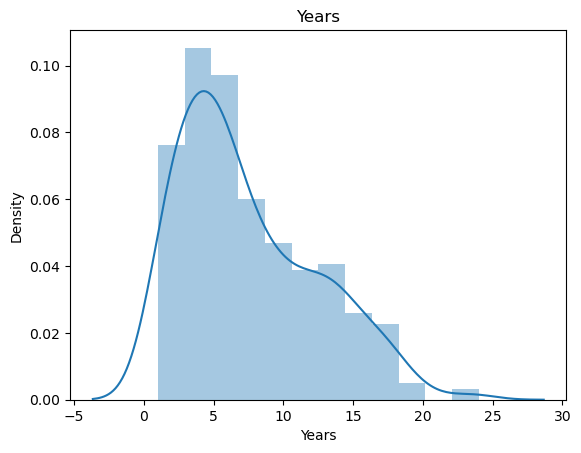

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
max     14053.000
Name: CAtBat, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


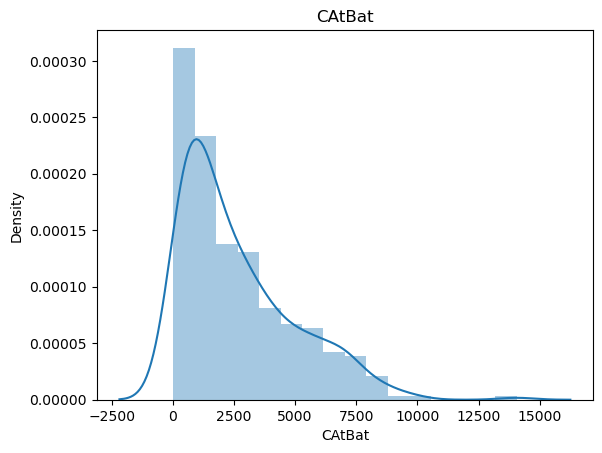

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
max     4256.000
Name: CHits, dtype: float64


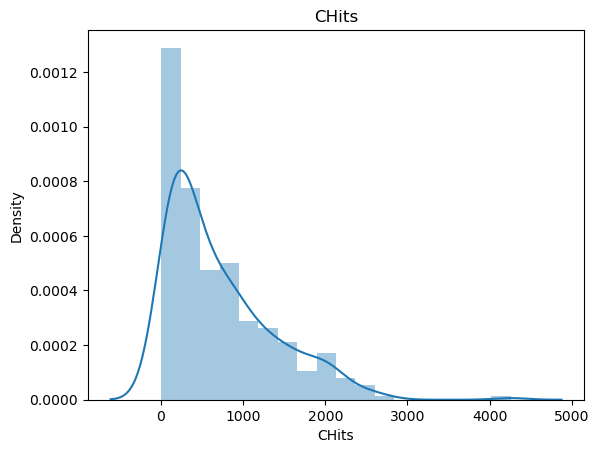

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
max     548.000
Name: CHmRun, dtype: float64


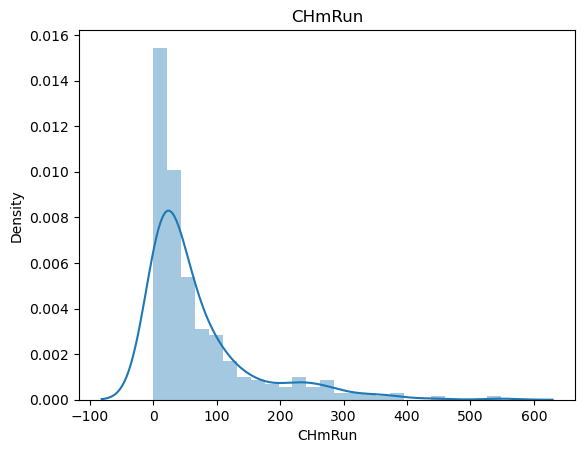

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
max     2165.000
Name: CRuns, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


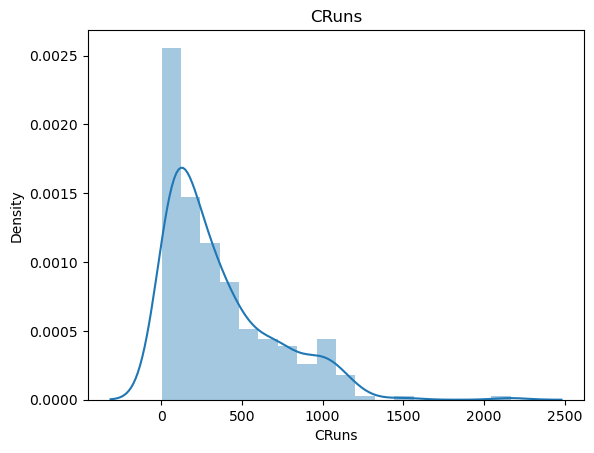

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
max     1659.000
Name: CRBI, dtype: float64


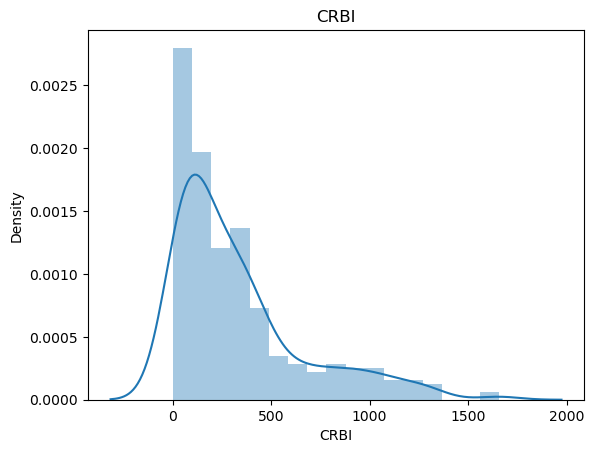

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
max     1566.000
Name: CWalks, dtype: float64


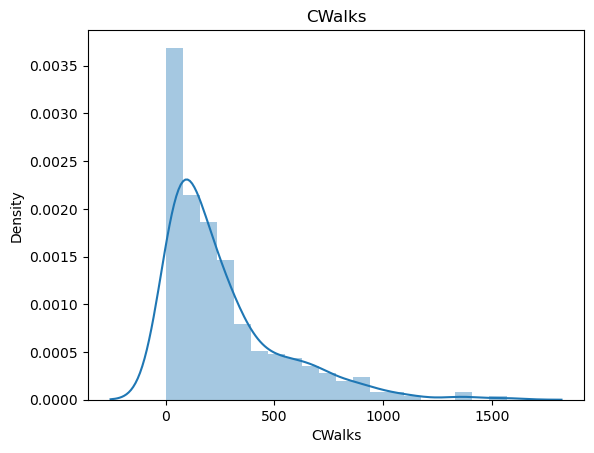

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
max     1378.000
Name: PutOuts, dtype: float64


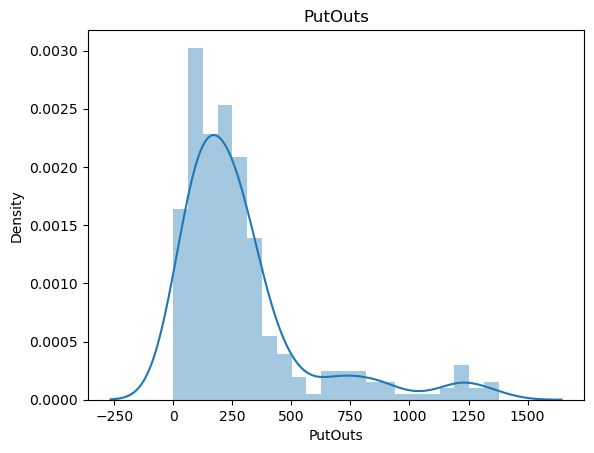

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
max     492.000
Name: Assists, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


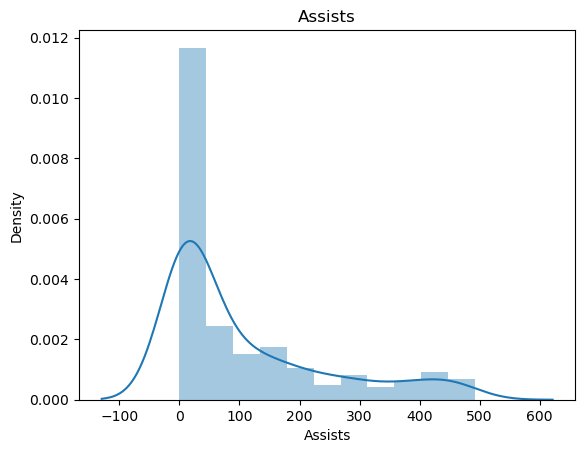

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
max      32.000
Name: Errors, dtype: float64


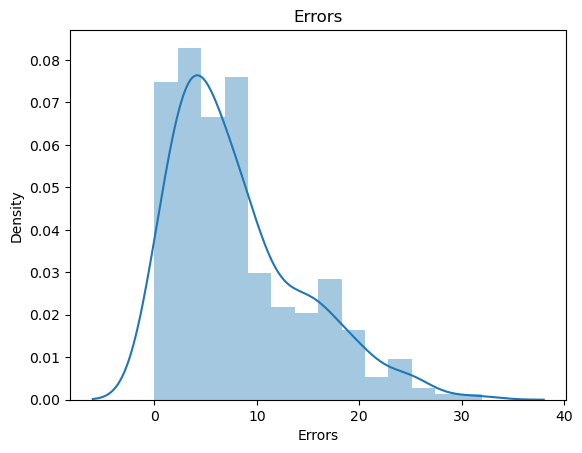

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
max     2460.000
Name: Salary, dtype: float64


C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


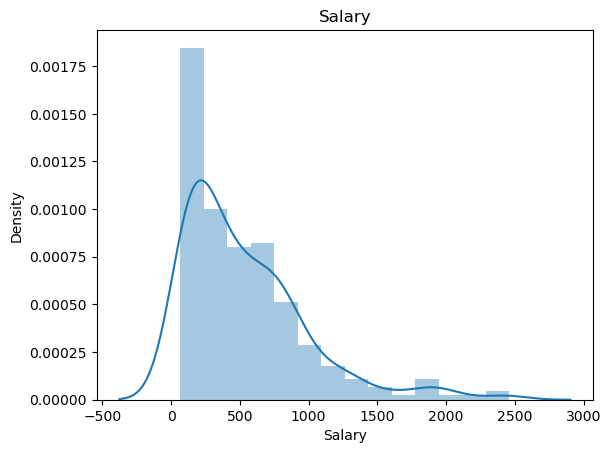

In [15]:
def num_summary(dataframe,num_col,plot=False):
    quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        #dataframe[num_col].hist()
        sns.distplot(dataframe[num_col])
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col ,plot=True)

In [16]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,0.968,1.000,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,0.592,0.562,1.000,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,0.913,0.922,0.651,1.000,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,0.821,0.811,0.855,0.798,1.000,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,0.670,0.641,0.481,0.732,0.616,1.000,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,0.047,0.045,0.116,0.005,0.146,0.136,1.000,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,0.236,0.228,0.222,0.186,0.295,0.277,0.920,1.000,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,0.253,0.256,0.221,0.205,0.308,0.281,0.904,0.995,1.000,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,0.237,0.203,0.493,0.228,0.442,0.332,0.727,0.799,0.783,1.000,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


C:\Users\can\AppData\Local\Temp\ipykernel_26200\1913882594.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


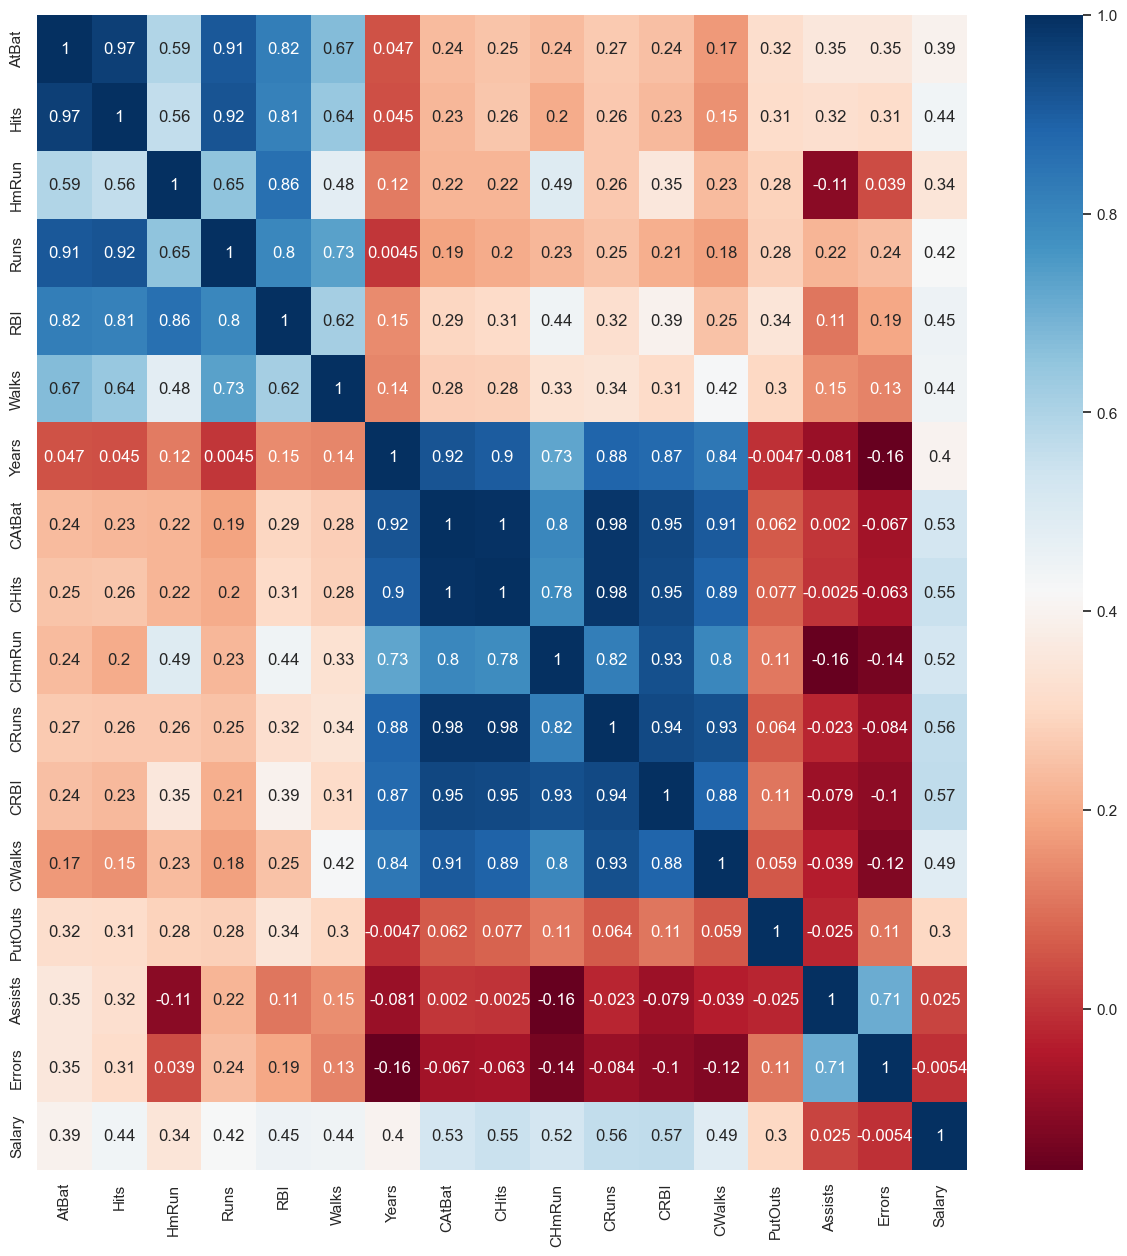

['Hits', 'Runs', 'RBI', 'CAtBat', 'CHits', 'CRuns', 'CRBI', 'CWalks']

In [17]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    return drop_list


high_correlated_cols(df, plot=True)

## Değişken Oluşturma

In [18]:
df['NEW_HitRatio'] = df['Hits'] / df['AtBat']
df['NEW_RunRatio'] = df['HmRun'] / df['Runs']
df['NEW_CHitRatio'] = df['CHits'] / df['CAtBat']
df['NEW_CRunRatio'] = df['CHmRun'] / df['CRuns']

df['NEW_Avg_AtBat'] = df['CAtBat'] / df['Years']
df['NEW_Avg_Hits'] = df['CHits'] / df['Years']
df['NEW_Avg_HmRun'] = df['CHmRun'] / df['Years']
df['NEW_Avg_Runs'] = df['CRuns'] / df['Years']
df['NEW_Avg_RBI'] = df['CRBI'] / df['Years']
df['NEW_Avg_Walks'] = df['CWalks'] / df['Years']

### Eksik Değer Kontrolü

In [19]:
def missing_values_table(dataframe,na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum()/dataframe.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    print(missing_df,end="\n")
    if na_name:
        return na_columns

missing_values_table(df,na_name=True)


              n_miss  ratio
Salary            59 18.320
NEW_RunRatio       1  0.310


['Salary', 'NEW_RunRatio']

C:\Users\can\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


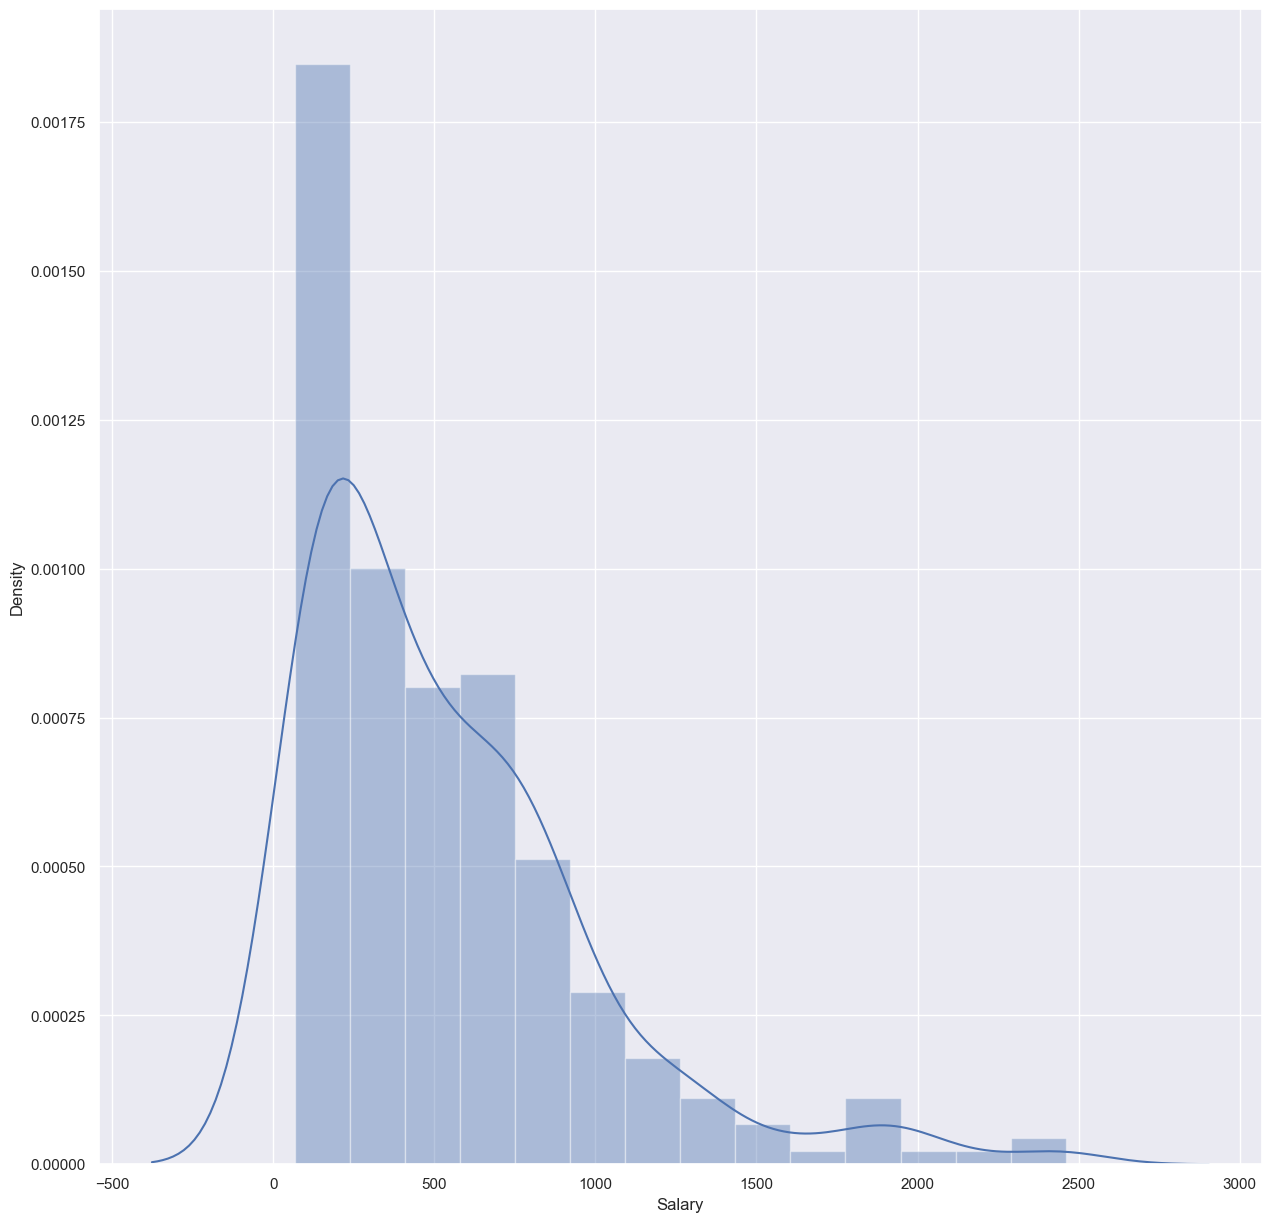

In [20]:
sns.distplot(df["Salary"])
plt.show()

#### DF SALARY DEĞİŞKENİ SAĞA ÇARPIK OLDUGU İÇİN MEDİAN DEĞERİYLE DOLDURULMASI UYGUNDUR.


In [21]:
print("Salary mean:" ,df["Salary"].mean() , "\nSalary Median:" , df["Salary"].median())


Salary mean: 535.9258821292775 
Salary Median: 425.0


In [22]:
df["Salary"].fillna(df["Salary"].median(skipna=True), inplace=True)

In [23]:
df.dropna(inplace=True) 

## Aykırı Değer

In [24]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5*interquantile_range
    low_limit = quantile1 - 1.5*interquantile_range
    return low_limit,up_limit


In [25]:
def check_outlier(dataframe,col_name):
    low_limit,up_limit = outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)|(dataframe[col_name]<low_limit)].any(axis=None):
        return True
    else:
        return False

In [26]:
for col in num_cols:
    print(col,check_outlier(df,col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [27]:
def replace_with_thresholds(dataframe,variable):
    low_limit,up_limit = outlier_thresholds(dataframe,variable)
    dataframe.loc[(dataframe[variable]<low_limit),variable] = low_limit
    dataframe.loc[(dataframe[variable]>up_limit),variable] = up_limit
for col in num_cols:
    replace_with_thresholds(df,col)

#### One hot encoding

In [28]:
def one_hot_encoder(dataframe,categorical_cols,drop_first = True):
    dataframe = pd.get_dummies(dataframe,columns=categorical_cols,drop_first=drop_first)
    return dataframe
df = one_hot_encoder(df, cat_cols)

## Modelleme

In [29]:
y = df['Salary']
X = df.drop("Salary", axis=1)

In [30]:
scaler = StandardScaler().fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)


In [32]:
model = ols("y ~ X", df).fit()
anova_results = anova_lm(model)
anova_results


,df,sum_sq,mean_sq,F,PR(>F)
X,29.000,20236321.759,697804.199,11.726,0.000
Residual,291.000,17317688.717,59510.958,NaN,NaN


### H0 = B1 = B2 = Bn = 0 
#### H0 red edilir. Model anlamlıdır.

In [33]:
X_c = sm.add_constant(X)
model2 = sm.OLS(y,X_c)
model2_results = model2.fit()
model2_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     11.73
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.14e-34
Time:                        17:05:39   Log-Likelihood:                -2204.3
No. Observations:                 321   AIC:                             4469.
Df Residuals:                     291   BIC:                             4582.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           573.6429    281.838      2.035      0.043      18.944    1128.341
AtBat            -0.8918      0.849     -1.050      0.295      -2.563       0.780
Hits              2.4420      3.219      0.759      0.449      -3.894       8.778
HmRun            11.0611      7.105      1.557      0.121      -2.923      25.046
Runs             -0.5625      2.697     -0.209      0.835      -5.870       4.745
RBI              -1.3437      2.195     -0.612      0.541      -5.665       2.977
Walks             4.8834      1.807      2.702      0.007       1.327       8.440
Years            -2.0537     11.829     -0.174      0.862     -25.336      21.228
CAtBat           -0.1244      0.144     -0.864      0.388      -0.408       0.159
CHits             0.0633      0.482      0.131      0.896      -0.886       1.013
CHmRun            0.9344      1.378      0.678      0.498      -1.777       3.646
CRuns             0.5704      0.566      1.007      0.315      -0.544       1.685
CRBI              0.0723      0.530      0.136      0.892      -0.972       1.116
CWalks            0.6678      0.339      1.969      0.050       0.000       1.335
PutOuts           0.2581      0.087      2.976      0.003       0.087       0.429
Assists           0.1990      0.179      1.111      0.267      -0.153       0.551
Errors           -3.3040      3.508     -0.942      0.347     -10.209       3.601
NEW_HitRatio   -684.4479   1117.628     -0.612      0.541   -2884.108    1515.212
NEW_RunRatio   -418.6506    301.241     -1.390      0.166   -1011.539     174.238
NEW_CHitRatio  -778.3840   1789.613     -0.435      0.664   -4300.610    2743.842
NEW_CRunRatio   240.8009    384.272      0.627      0.531    -515.503     997.105
NEW_Avg_AtBat    -1.8656      1.687     -1.106      0.270      -5.185       1.454
NEW_Avg_Hits     10.6681      6.579      1.622      0.106      -2.279      23.616
NEW_Avg_HmRun   -11.5349     13.166     -0.876      0.382     -37.447      14.377
NEW_Avg_Runs     -1.1004      5.892     -0.187      0.852     -12.696      10.495
NEW_Avg_RBI       3.1445      5.154      0.610      0.542      -7.000      13.289
NEW_Avg_Walks    -8.5446      3.387     -2.523      0.012     -15.210      -1.879
League_N         56.0787     60.162      0.932      0.352     -62.330     174.487
Division_W      -70.0836     28.324     -2.474      0.014    -125.829     -14.338
NewLeague_N     -24.6741     60.195     -0.410      0.682    -143.146      93.798
==============================================================================
Omnibus:                        4.293   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.006
Skew:                           0.237   Prob(JB):                        0.135
Kurtosis:                       3.274   Cond. No.            

### Prob (F-statistic) 0.05'ten küçük olduğu için model anlamlıdır.
### Modelin belirtme katsayısı yaklaşık %54'tür
### Walks , PutOuts , NEW_Avg_Walks , Division_W değişkenleri varsayılan 0.05lik p value değerinden küçük olduğu için model için anlamlı değildir.
### Prob(Omnibus) > 0.05'den olduğu için hatalar normal dağılımlıdır.
### Skew değeri -0.5 - 0.5 aralığında olmadıgı için veri simetrik değildir.
### Prob(JB) > 0.05 olduğundan dağılım normal , çarpıklığın sıfır ve basıklığın 3 olduğudur.
### Durbin-Watson'un iki civarında olması otokorelasyon olmadığını belirtir.

<br>

### Çoklu doğrusal bağlantı kontrolü

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Değişken'] = X.columns
vif[vif["VIF"]>30]


,VIF,Değişken
0,649.519,AtBat
1,687.337,Hits
2,51.904,HmRun
3,128.417,Runs
4,77.945,RBI
...,...,...
21,1510.948,NEW_Avg_Hits
22,103.833,NEW_Avg_HmRun
23,439.050,NEW_Avg_Runs
24,279.784,NEW_Avg_RBI


In [35]:
print(len(vif[vif["VIF"]>30]),"değişkende çoklu doğrusal bağlantı problemi vardır.")


22 değişkende çoklu doğrusal bağlantı problemi vardır.


<br>

## Model Seçim İşlemi

In [36]:
all_models = []
models = [('LR', LinearRegression()),
            ("Ridge", Ridge()),
            ("Lasso", Lasso()),
            ("ElasticNet", ElasticNet()),
            ('CART', DecisionTreeRegressor()),
            ('RF', RandomForestRegressor()),
            ('SVR', SVR()),
            ('GBM', GradientBoostingRegressor()),
            ("XGBoost", XGBRegressor()),
            ("LightGBM", LGBMRegressor()),
            ("CatBoost", CatBoostRegressor(verbose=False))]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    values = dict(name=name, RMSE_TRAIN=rmse_train, RMSE_TEST=rmse_test)
    all_models.append(values)
    sort_method = True
    all_models_df = pd.DataFrame(all_models)
    all_models_df = all_models_df.sort_values(all_models_df.columns[2], ascending=sort_method)

C:\Users\can\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.949e+06, tolerance: 3.173e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\can\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.103e+06, tolerance: 3.173e+03
  model = cd_fast.enet_coordinate_descent(


In [37]:
all_models_df

,name,RMSE_TRAIN,RMSE_TEST
5,RF,82.801,207.330
7,GBM,59.949,207.498
9,LightGBM,66.442,208.491
10,CatBoost,10.601,209.873
8,XGBoost,0.011,229.778
4,CART,0.000,235.534
3,ElasticNet,234.670,253.823
2,Lasso,232.908,254.931
1,Ridge,232.149,256.147
0,LR,230.887,259.118


## En düşük hatayı veren Random Forest

<br>

## Final modeli oluşturma

In [38]:
rf_model = RandomForestRegressor(random_state=45).fit(X_train, y_train)

In [39]:
rf_params = {
    "max_depth":[5,6,8,10,12],
    "max_features":[3,7,9,11,"auto"],
    "min_samples_split":[5,10,12],
    "n_estimators":[100,200,500]
}

In [40]:
rf_best_grid = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=True).fit(X,y)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


### En iyi parametreler

In [41]:
rf_best_grid.best_params_

{'max_depth': 12,
 'max_features': 7,
 'min_samples_split': 10,
 'n_estimators': 100}

In [42]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state=45).fit(X,y)

In [43]:
y_pred = rf_final.predict(X_train)
print("RF Final Train Hatası:", np.sqrt(mean_squared_error(y_train, y_pred)))

RF Final Train Hatası: 122.1132948962053


In [44]:
y_pred = rf_final.predict(X_test)
print("RF Final Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred)))

RF Final Test Hatası: 113.75666987178025


<br>

## Değişken Önem Düzeyi Görseli

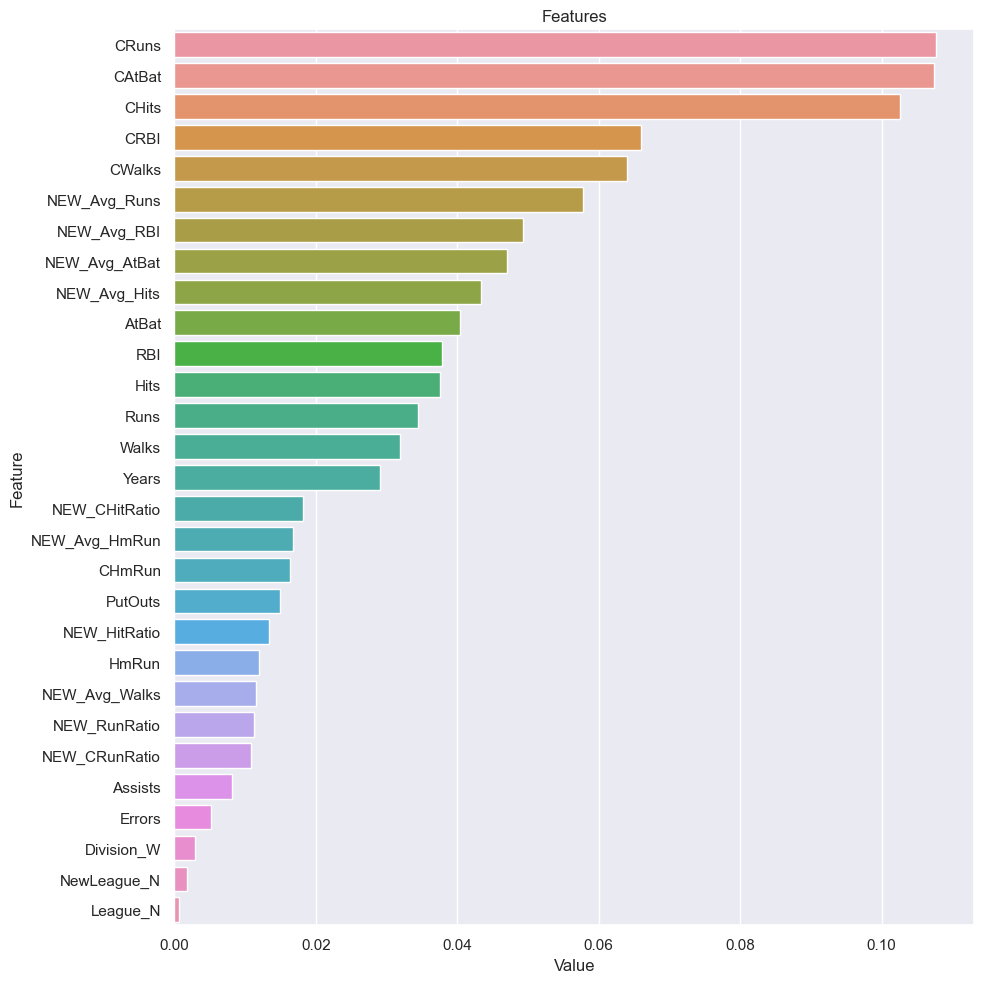

In [45]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_final, X)

<br>

### Model kaydetme

In [46]:
import pickle
pickle.dump(rf_final, open("hitters_final_model.pkl", 'wb'))